<h1>Chicago Crime Analysis - Using Data Science to understand crime in Chicago in the year 2018</h1>
<p>Open Lab Project</p>

<strong>Libraries Used</strong>
<ul><li>pandas</li>
    <li>matplotlib</li>
    <li>seaborn</li>
    <li>numpy</li>
    <li>datetime</li>
    <li>folium</li>
    <li>bokeh</li>
</ul>

<strong>Team Members</strong>
<ul><li>Ramshankar</li>
    <li>Srikanth</li>
    <li>Manishankar</li>
    <li>Jaswanth</li>
</ul>

<p><strong>Size of Dataset : </strong>65 MB</p>

<strong>URL of Dataset : </strong>https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2

<h3>The main aims of the Project : </h3>

<strong>Common Crimes in Chicago</strong>
<ul><li>A graph depicting the most occurring offences in Chicago in 2018.</li>
    <li>A comparison of the frequency of the top 5 most commonly committed offences</li>
</ul>
<strong>Arrests and the City of Chicago</strong>
<ul><li>What is the probability of an arrest ?</li>
    <li>Distribution of Arrests across the month</li>
    <li>How does arrest vary according to the type of crime ?</li>
</ul>
<strong>Crime vs Time</strong>
<ul><li>How does crime vary across the year ?</li>
    <li>Which hours are the most unsafest ?</li>
    <li>What crimes are more prone to happen in the cover of darkness than in the morning ?</li>
    <li>Is your house safe from a burglary during the day ?</li>
    <li>Visualize a crime's 24 hour pattern</li>
</ul>
<strong>Crime vs Locations</strong>
<ul><li>Which district is the safest to live in? Which district is "Sin-district" ?</li>
    <li>Visualize most occurring crimes per district</li>
    <li>Concentration of Crime in the City</li>
    <li>You live in area X. You wish to see the crime stats in X in the year of 2018, especially of "Burglary". Visualize a time series graph to see the same.</li>
    <li>Are there obvious patterns in distinguished gang activity in Chicago in 2018?</li>
</ul>
<strong>Predictive Models on our data</strong>  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

<h2>Data Acquisition</h2>

In [2]:
# Loading the csv dataset into the df variable
df = pd.read_csv('crimes_2018.csv')

<h3>Scanning the data</h3>

In [3]:
# The number of rows and columns in the dataset; returns a tuple
df.shape

(265698, 22)

In [4]:
# Summary Statistics of the data
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.656980e+05,265698.000000,265698.000000,265695.000000,265696.000000,2.636030e+05,2.636030e+05,265698.0,263603.000000,263603.000000
mean,1.135067e+07,1142.224590,11.193735,23.439609,36.469774,1.165009e+06,1.886592e+06,2018.0,41.844396,-87.669977
std,5.375518e+05,696.079873,6.952656,14.094161,21.454410,1.603617e+04,3.118507e+04,0.0,0.085756,0.058385
min,2.375700e+04,111.000000,1.000000,1.000000,0.000000,1.092706e+06,1.813897e+06,2018.0,41.644590,-87.934273
25%,1.128604e+07,611.000000,6.000000,10.000000,23.000000,1.153334e+06,1.859421e+06,2018.0,41.769663,-87.712383
50%,1.137493e+07,1031.000000,10.000000,24.000000,32.000000,1.166911e+06,1.894241e+06,2018.0,41.865575,-87.663280
75%,1.146394e+07,1723.000000,17.000000,35.000000,53.000000,1.176461e+06,1.908735e+06,2018.0,41.905324,-87.627842
max,1.160129e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951535e+06,2018.0,42.022671,-87.524529


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265698 entries, 0 to 265697
Data columns (total 22 columns):
ID                      265698 non-null int64
Case Number             265698 non-null object
Date                    265698 non-null object
Block                   265698 non-null object
IUCR                    265698 non-null object
Primary Type            265698 non-null object
Description             265698 non-null object
Location Description    264940 non-null object
Arrest                  265698 non-null bool
Domestic                265698 non-null bool
Beat                    265698 non-null int64
District                265698 non-null int64
Ward                    265695 non-null float64
Community Area          265696 non-null float64
FBI Code                265698 non-null object
X Coordinate            263603 non-null float64
Y Coordinate            263603 non-null float64
Year                    265698 non-null int64
Updated On              265698 non-null object


In [6]:
sns.set_style('darkgrid')

In [7]:
# First 5 rows of our dataset
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11268908,JB202456,03/28/2018 07:50:00 AM,004XX W DIVISION ST,0860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,True,False,...,27.0,8.0,06,1173175.0,1908290.0,2018,02/20/2019 04:21:43 PM,41.903776,-87.639324,"(41.903775756, -87.639324074)"
1,11210587,JB124894,01/22/2018 12:10:00 AM,0000X E CHESTNUT ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,2.0,8.0,02,1176408.0,1906333.0,2018,02/20/2019 04:21:43 PM,41.898333,-87.627508,"(41.898333269, -87.62750777)"
2,11207682,JB120881,01/18/2018 04:50:00 PM,006XX N LECLAIRE AVE,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,37.0,25.0,04B,1142252.0,1903601.0,2018,02/20/2019 04:21:43 PM,41.891539,-87.753029,"(41.891538918, -87.753028938)"
3,11599687,JC157279,12/24/2018 09:00:00 AM,011XX W 15TH ST,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,...,11.0,28.0,11,NaN,NaN,2018,02/19/2019 04:22:18 PM,NaN,NaN,NaN
4,11599643,JC157354,12/18/2018 10:00:00 AM,007XX E 89TH PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,OTHER,False,True,...,8.0,44.0,26,NaN,NaN,2018,02/19/2019 04:22:18 PM,NaN,NaN,NaN


<h4>What are our Features?</h4>

In [8]:
# The names of the features
print("The names of the features :\n", list(df.columns))

The names of the features :
 ['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location']


<h3>Number of Distinct Crimes in the city of Chicago in 2018</h3>

In [9]:
# Number of distinct crimes in the city in 2018
crimes = df['Primary Type'].unique()
print("The Number of distinct crimes in Chicago in the year 2018:", len(crimes))
print()
print("The Distinct Crimes are :\n", crimes)

The Number of distinct crimes in Chicago in the year 2018: 32

The Distinct Crimes are :
 ['THEFT' 'CRIM SEXUAL ASSAULT' 'BATTERY' 'DECEPTIVE PRACTICE'
 'OTHER OFFENSE' 'ASSAULT' 'MOTOR VEHICLE THEFT' 'CRIMINAL TRESPASS'
 'HOMICIDE' 'OFFENSE INVOLVING CHILDREN' 'SEX OFFENSE' 'WEAPONS VIOLATION'
 'ROBBERY' 'BURGLARY' 'KIDNAPPING' 'CRIMINAL DAMAGE'
 'PUBLIC PEACE VIOLATION' 'INTIMIDATION' 'OBSCENITY' 'STALKING' 'ARSON'
 'NARCOTICS' 'PROSTITUTION' 'LIQUOR LAW VIOLATION'
 'CONCEALED CARRY LICENSE VIOLATION' 'INTERFERENCE WITH PUBLIC OFFICER'
 'HUMAN TRAFFICKING' 'NON-CRIMINAL' 'PUBLIC INDECENCY' 'GAMBLING'
 'OTHER NARCOTIC VIOLATION' 'NON-CRIMINAL (SUBJECT SPECIFIED)']


<h2>Dealing With Missing Values</h2>

In [10]:
# What are the total missing values in the dataset ?
print("Number of Missing Values in the whole dataset : ", df.isna().sum().sum())

Number of Missing Values in the whole dataset :  11238


In [11]:
# Let's count number of null entries per feature
missing_values = list(df.isna().sum())
# missing values is a list of the number of missing values in each column

cols = list(df.columns)
col_final = []
for i in range(len(cols)):
    if (missing_values[i] == 0):
        cols[i]="Others"
d = dict(zip(cols, missing_values)) # making a dicionary for the missing values

print("Number of Missing Values per feature >>")
missing_vals = pd.DataFrame(d, index=["Missing Values"]) # Making a custom dataframe from dict d
missing_vals.head()

Number of Missing Values per feature >>


,Others,Location Description,Ward,Community Area,X Coordinate,Y Coordinate,Latitude,Longitude,Location
Missing Values,0,758,3,2,2095,2095,2095,2095,2095


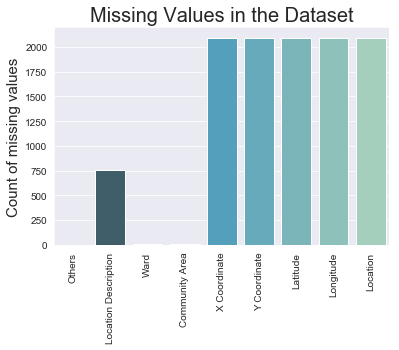

In [12]:
# Plotting the missing values in the dataset
x = list(d.keys())
y = list(d.values())
sns.barplot(x=x, y=y, palette="GnBu_d")
plt.xticks(rotation=90)
plt.title("Missing Values in the Dataset", fontdict = {'fontsize': 20})
plt.ylabel("Count of missing values", fontdict={'fontsize': 15})
plt.show()

<h4>A Bit about the Missing values</h4>

<strong>Why is data missing in the first place ?</strong>
<p>Inspecting the features, we see that all the features that have a large count of missing values are features that relate to the geographical location of the crime scene. This is <strong>No Surprise</strong> as the Chicago Crime Dataset is based on first hand accounts of people involved in or around the crime. It is not necessary that such first hand reports need to contain the specific locations of the crime.<br>
    <strong>Disclaimer: These crimes may be based upon preliminary information supplied to the Police Department by the reporting parties that have not been verified. The preliminary crime classifications may be changed at a later date based upon additional investigation and there is always the possibility of mechanical or human error. </strong><br>Therefore, these missing values can be perfectly accounted for.</p>


<p>We have 11,238 missing values in the whole dataset that are present in Location Description, Ward, Community Area, X Co-ordinate, Y Co-ordinate, Latitude, Longitude and Location.<br>Since, these features are not direct numeric values, we can't use summary statistical functions to fill in the missing values.<br><strong>Hence, we shall be removing these values from the dataset.</strong></p>

In [13]:
# The simplest cleaning technique here would be to drop all the rows with atleast one missing value
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262960 entries, 0 to 265696
Data columns (total 22 columns):
ID                      262960 non-null int64
Case Number             262960 non-null object
Date                    262960 non-null object
Block                   262960 non-null object
IUCR                    262960 non-null object
Primary Type            262960 non-null object
Description             262960 non-null object
Location Description    262960 non-null object
Arrest                  262960 non-null bool
Domestic                262960 non-null bool
Beat                    262960 non-null int64
District                262960 non-null int64
Ward                    262960 non-null float64
Community Area          262960 non-null float64
FBI Code                262960 non-null object
X Coordinate            262960 non-null float64
Y Coordinate            262960 non-null float64
Year                    262960 non-null int64
Updated On              262960 non-null object


In [14]:
# How much of the data has been retained after this removal ?
print(round(262960 / 265698 * 100,2), "percentage of the data has been retained.")

98.97 percentage of the data has been retained.


<p>Dropping the rows will usually result in <strong>clean datasets and produce well-behaved</strong> data. But often, it removes a lot of information that reduces result accuracy.<br>However, in our case, since <strong>98.97% of the data</strong> is retained and since there is practically no other way to work around the type of missing values we have, we shall go ahead with this slightly diminished dataset</p>

In [15]:
# Continuous Variables
cont = df._get_numeric_data().columns
print("The continuous variables are: ",list(cont))

The continuous variables are:  ['ID', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'X Coordinate', 'Y Coordinate', 'Year', 'Latitude', 'Longitude']


In [16]:
# Categorical Variables
print("The categorical variables are: ",list(set(df.columns) - set(cont)))

The categorical variables are:  ['Updated On', 'Description', 'FBI Code', 'IUCR', 'Primary Type', 'Location', 'Case Number', 'Date', 'Block', 'Location Description']


<h4>Check for available plot styles</h4>

In [17]:
# use plt.style.available to view all possible styles

<h2>1. Common Crimes in Chicago</h2>
<h3>Top Crimes in Chicago in the year 2018</h3>

URL for fonts : http://jonathansoma.com/lede/data-studio/matplotlib/list-all-fonts-available-in-matplotlib-plus-samples/

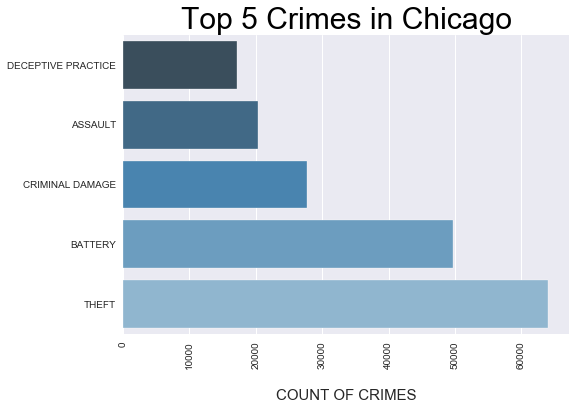

In [18]:
# Set the style of the plot first
plt.style.use('seaborn')

# Filter out the Top 5 crimes
top_5_crimes = df['Primary Type'].value_counts().sort_values(ascending=False).head()

temp = df.groupby('Primary Type', as_index=False).agg({"ID": "count"})
temp = temp.sort_values(by=['ID'], ascending=False).head()
temp = temp.sort_values(by='ID', ascending=True)
sns.barplot(x='ID', y='Primary Type', data=temp, palette="Blues_d")

# Work on the aestehtic appeal of the plot
plt.title("Top 5 Crimes in Chicago", fontdict = {'fontsize': 30, 'fontname':'Arial', 'color': '#000000'})
plt.xlabel("\nCOUNT OF CRIMES", fontdict = {'fontsize': 15})
plt.ylabel("")
plt.xticks(rotation=90)
plt.show()
#plt.show()

In [19]:
# Doing a bit of df manipulation for using bokeh
temp.head()
temp.columns=['Crime','Number']
temp.index=[0,1,2,3,4]
temp['co-ordinates']=[1,2,3,4,5]
temp.head()

,Crime,Number,co-ordinates
0,DECEPTIVE PRACTICE,17233,1
1,ASSAULT,20343,2
2,CRIMINAL DAMAGE,27701,3
3,BATTERY,49727,4
4,THEFT,64032,5


In [20]:
# Making an interactive plot in Bokeh

from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool

temp_cds = ColumnDataSource(temp)

fig1 = figure(plot_width=700, plot_height=400, title="Most occuring Criminal Offences in Chicago",
             x_axis_label="Count of Crimes", y_axis_label="Crime Type", x_range=(0, 70000))

fig1.title.align = "left"
fig1.title.text_color = "black"
fig1.title.text_font_size = "20px"

fig1.hbar(y='co-ordinates', right='Number', source=temp_cds, left=0, color='red', alpha=0.5, height=0.50)
fig1.yaxis.major_label_overrides = {5: 'Theft', 4:'Battery', 3:'Criminal Damage', 2:'Assault',
                                   1:'Deceptive Practice'}

# Adding passive interactivity
tooltips = [
    ('Number of Crimes', '@Number'),
]

#fig1.legend.location
fig1.add_tools(HoverTool(tooltips=tooltips))

output_notebook()
show(fig1)

Loading BokehJS ...

<h3>Most Occurring Top 5 Crimes in Chicago in 2018</h3>
<ul><li>Theft</li>
    <li>Battery</li>
    <li>Criminal Damage</li>
    <li>Assault</li>
    <li>Deceptive Practice</li>
</ul>

<h4>Modifying the Date Column to a Pythonic Format</h4>

In [21]:
# Testing out the time and date conversion for one entry

t = df['Date'][20]
print(t)
s1 = t[:11] 
print(s1)
s2 = t[11:]
print(s2)

print(s2)
hr = s2[:2]
mins = s2[3:5]
sec = s2[6:8]
time_frame = s2[9:]
if(time_frame == 'PM'):
    if (int(hr) != 12):
        hr = str(int(hr) + 12)
else:
    if(int(hr) == 12):
        hr = '00'

print(hr, mins, sec)

10/21/2018 03:09:00 AM
10/21/2018 
03:09:00 AM
03:09:00 AM
03 09 00


In [22]:
# Testing out our code

month = s1[:2]
date = s1[3:5]
year = s1[6:10]

final_date = datetime(int(year), int(month), int(date), int(hr), int(mins), int(sec))
print(final_date)

2018-10-21 03:09:00


<h4>Convert the date-time column to a known format - Applying the above code onto our data</h4>

In [23]:
# Time Conversion Function
def time_convert(date_time):
    s1 = date_time[:11]
    s2 = date_time[11:]
    
    month = s1[:2]
    date = s1[3:5]
    year = s1[6:10]
    
    hr = s2[:2]
    mins = s2[3:5]
    sec = s2[6:8]
    time_frame = s2[9:]
    if(time_frame == 'PM'):
        if (int(hr) != 12):
            hr = str(int(hr) + 12)
    else:
        if(int(hr) == 12):
            hr = '00'
    
    final_date = datetime(int(year), int(month), int(date), int(hr), int(mins), int(sec))
    return final_date

In [24]:
# Using apply() of pandas to apply time_convert on every row of the Date column
df['Date'] = df['Date'].apply(time_convert)

<h4>Feature Engineering 1 : Create a new column "Month"</h4>

In [25]:
def month(x):
    return x.strftime("%B")
df['Month'] = df['Date'].apply(month)

In [26]:
# Frequency of the most occuring crimes over the year 2018

theft_dict ={} # dictionary
battery_dict = {}
crim_dam = {}
assault = {}
dec_prac = {}

months = df["Month"].unique()
for month in months :
    theft_dict[month]=0
    battery_dict[month]=0
    crim_dam[month]=0
    assault[month]=0
    dec_prac[month]=0

for elem in df[df["Primary Type"]=="THEFT"]["Month"]:
    if elem in theft_dict.keys():
        theft_dict[elem] += 1

for elem in df[df["Primary Type"]=="BATTERY"]["Month"]:
    if elem in battery_dict.keys():
        battery_dict[elem] += 1
        
for elem in df[df["Primary Type"]=="CRIMINAL DAMAGE"]["Month"]:
    if elem in crim_dam.keys():
        crim_dam[elem] += 1
        
for elem in df[df["Primary Type"]=="ASSAULT"]["Month"]:
    if elem in assault.keys():
        assault[elem] += 1
        
for elem in df[df["Primary Type"]=="DECEPTIVE PRACTICE"]["Month"]:
    if elem in dec_prac.keys():
        dec_prac[elem] += 1
        
        
# Let's order the above dictionaries for proper plotting
months=['January','February','March','April','May','June','July','August','September','October','November','December']
theft_list = [(k,theft_dict[k]) for k in months]
battery_list = [(k,battery_dict[k]) for k in months]
crim_dam_list = [(k,crim_dam[k]) for k in months]
assault_list = [(k,assault[k]) for k in months]
dec_prac_list = [(k,dec_prac[k]) for k in months]

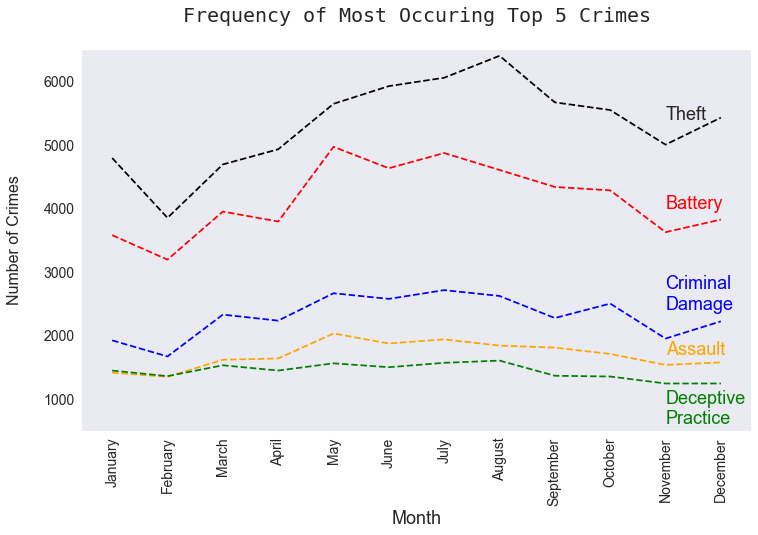

In [27]:
# Plotting the graphs

plt.style.use('seaborn-dark')
#sns.set(rc={'axes.facecolor':'A0D7E6', 'figure.facecolor':'ffffff'})
fig, ax = plt.subplots(figsize=(12,7))

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

# Setting the ticks only on the bottom and the left of the graph
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()   

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylim(500, 6500)

x = [z[0] for z in theft_list]
# print(x)
y = [z[1] for z in theft_list]
ax.plot(x,y, color="black")
ax.lines[0].set_linestyle("--")

x = [z[0] for z in battery_list]
y = [z[1] for z in battery_list]
ax.plot(x,y, color="red")
ax.lines[1].set_linestyle("--")

x = [z[0] for z in crim_dam_list]
y = [z[1] for z in crim_dam_list]
ax.plot(x,y, color="blue")
ax.lines[2].set_linestyle("--")

x = [z[0] for z in assault_list]
y = [z[1] for z in assault_list]
ax.plot(x,y, color="orange")
ax.lines[3].set_linestyle("--")

# x,y = zip(*dec_prac.items())
x = [z[0] for z in dec_prac_list]
y = [z[1] for z in dec_prac_list]
ax.plot(x,y, color="green")
ax.lines[4].set_linestyle("--")


for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    
plt.text(10,5400,"Theft",fontsize=18)
plt.text(10,4000,"Battery",fontsize=18,color="red")
plt.text(10,2400,"Criminal\nDamage",fontsize=18,color="blue")
plt.text(10,1700,"Assault",fontsize=18,color="orange")
plt.text(10,600,"Deceptive\nPractice",fontsize=18,color="green")

ax.set_title("Frequency of Most Occuring Top 5 Crimes\n",fontname="monospace", fontsize=20)
ax.set_xlabel("Month", fontsize=18)
ax.set_ylabel("Number of Crimes\n", fontsize=16)
    
plt.show()

In [28]:
# Dataframes for each crime (Will be used in the further parts of our analysis)

theft_df = df[df['Primary Type']=='THEFT']
battery_df = df[df['Primary Type']=='BATTERY'] 
crim_dam_df = df[df['Primary Type']=='CRIMINAL DAMAGE']
assault_df = df[df['Primary Type']=='ASSAULT']
dec_prac_df = df[df['Primary Type']=='DECEPTIVE PRACTICE']

<h2>2. Arrests and the state of Chicago</h2>
<h3>Likelihood of an arrest</h3>

In [53]:
# df['Arrest'].head()
l = df["Arrest"].value_counts()
false = l[0]
true = l[1]

arrest = pd.DataFrame({'Status':['Not Arrested','Arrested'],'Value':list(l)})
print("Percentage of no arrests of all reported crimes :",false/(false+true)*100,'!')

Percentage of no arrests of all reported crimes : 80.16352296927289 !


<p>That's a stoking <strong>80%</strong> chance for evading an arrest!</p>

<h3>Distribution of arrests across the months</h3>

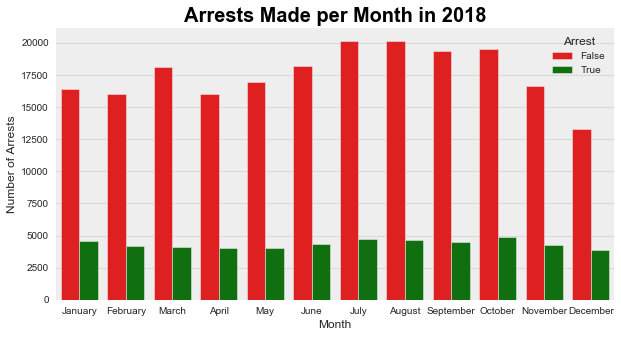

In [30]:
# How are arrests spread out across the months
plt.style.use('bmh')

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x="Month",
                   hue='Arrest',
                   data=df[['Month','Arrest']],
                   palette=['Red', 'Green'])
months = ['January','February','March','April','May','June','July',\
             'August','September','October','November','December']    

ax.set(title='Arrests Made per Month in 2018', xlabel='Month', ylabel='Number of Arrests', xticklabels=months)
plt.title('Arrests Made per Month in 2018', fontdict={'fontsize': 20, 'color': 'black'}, weight="bold")
plt.show()

<h3>How do arrests vary among the type of crime ?</h3>

In [31]:
# let's look at the pandas groupby function
#arrest_crime = df.groupby(['Primary Type', 'Arrest'])['ID'].count()
arrest_crime = df.groupby(['Primary Type', 'Arrest']).agg({'Arrest':"count"})
arrest_crime.columns = ["Count"]
# arrest_crime

In [32]:
import math

the_crimes=['THEFT','BATTERY','CRIMINAL DAMAGE','ASSAULT', 'DECEPTIVE PRACTICE','WEAPONS VIOLATION','NARCOTICS',
           'HOMICIDE','BURGLARY','INTERFERENCE WITH PUBLIC OFFICER']
# the_crimes has only the crimes we want to analyze now

# create the dataframe arrest
arrest = pd.DataFrame(columns=['Crime','True','False'])

# First, we make our dataset
for i,crime in enumerate(the_crimes):
    subset = df[df['Primary Type']==crime]
    true = subset['Arrest'].value_counts().sort_index()[1]
    false = subset['Arrest'].value_counts().sort_index()[0]
    temp_df = pd.DataFrame({'Crime':[crime], 'True':[true], 'False':[false]})
    
    arrest = arrest.append(temp_df)
    
    arrest['True_per']=arrest['True']/(arrest['True']+arrest['False'])*100
    arrest['False_per']=arrest['False']/(arrest['True']+arrest['False'])*100
    
# arrest is our dataset

# plot the dataset
def style(p):
        # Title 
        p.title.align = 'center'
        p.title.text_font_size = '20pt'
        p.title.text_font = 'serif'

        # Axis titles
        p.xaxis.axis_label_text_font_size = '14pt'
        p.xaxis.axis_label_text_font_style = 'bold'
        p.yaxis.axis_label_text_font_size = '14pt'
        p.yaxis.axis_label_text_font_style = 'bold'

        # Tick labels
        p.xaxis.major_label_text_font_size = '12pt'
        p.yaxis.major_label_text_font_size = '12pt'

        return p
    
#status = ['Arrested', 'Not Arrested']
status = ['Arrested','Not Arrested']

arrest_cds = ColumnDataSource(arrest)
crimes = arrest_cds.data['Crime'].tolist()
fig2 = figure(x_range=crimes, plot_width = 700, plot_height = 700, 
                title = 'Arrests vs Crime Type',
                x_axis_label = 'Arrest Status', y_axis_label = 'Number of Crimes')
fig2.vbar_stack(stackers = ['True','False'], x='Crime',width=0.25, legend=['Arrested', 'Not Arrested'], source=arrest_cds,
               color=['green','red'])
fig2.xaxis.major_label_orientation = math.pi/2

tooltips = [('Crime','@Crime'),('Arrested Percentage','@True_per'), ('Not Arrested Percentage', '@False_per')]
hover = HoverTool(tooltips=tooltips, mode='vline')

fig2.add_tools(hover)
    
# fig2=style(fig2)

output_notebook()
show(fig2)



c:\users\jaswanth marri\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Loading BokehJS ...

<h2>3. Crime vs Time</h2>
<h3>Distribution of crimes across the months</h3>

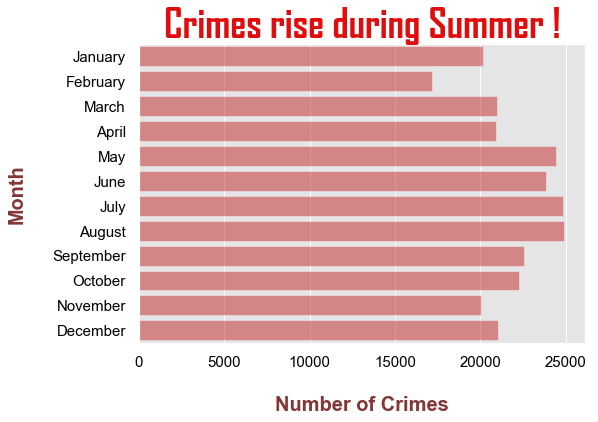

In [33]:
# Set plot style
plt.style.use('ggplot')
sns.set_context('notebook')

# Code to plot
sns.countplot(y='Month', data=df, palette=["#DF0D0D"], order=['January', 'February', 'March', 'April', 'May', 'June', "July", 'August', 'September', 'October', 'November', 'December'], alpha=0.5)

# Aesthetic appeal of the plot 
plt.title("Crimes rise during Summer !", fontdict={'fontsize': 40, 'color': '#DF0D0D', 'fontname':'Agency FB'}, weight="bold")
plt.ylabel("Month\n", fontdict={'fontsize': 20}, weight="bold", color="#833636")
plt.xlabel("\nNumber of Crimes", fontdict={'fontsize': 20}, weight="bold", color="#833636")

plt.xticks(fontsize=15,color='black')
plt.yticks(fontsize=15, color='black')
plt.show()

<p>The months of May, June, July and August have seen the most spike in crime rates in the city.<br>
It is very important here that we are able to make an intuitive observation that <strong>Crime rises in the Summer</strong>!</p>

<h4>Create a new column "Hour" [24 hour format]</h4>

In [34]:
def hour(x):
    return x.strftime("%H")
df['Hour_Day'] = df['Date'].apply(hour)

<h3>What are the most unsafest hours ?</h3>

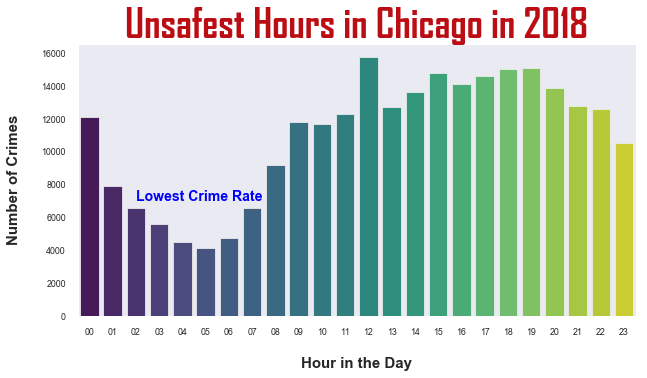

In [35]:
# Set plot style
plt.style.use('seaborn-dark')
sns.set_context('paper')

# Write code to plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='Hour_Day', data=df, palette="viridis")

# Aesthetic appeal
plt.title("Unsafest Hours in Chicago in 2018", fontdict={'fontsize': 40, 'color': '#bb0e14','fontname':'Agency FB'}, weight="bold")
plt.xlabel("\nHour in the Day", fontdict={'fontsize': 15}, weight='bold')
plt.ylabel("Number of Crimes\n", fontdict={'fontsize': 15}, weight="bold")

# Add Text to the plot
plt.text(2, 7000, 'Lowest Crime Rate', fontdict={'fontsize': 14, 'color':"blue" }, weight='bold')

plt.show()

<p>Crime rate slumps from midnight (00 hours) to 05 hours.<br>
    <strong>Well, Criminals need sleep too!</strong>
</p>

<h3>Crime Patterns across 24 hours</h3>

In [36]:
# Which crimes are more prone to happen in the cover of darkness ?
the_crimes=['THEFT','BATTERY','CRIMINAL DAMAGE','ASSAULT', 'DECEPTIVE PRACTICE','WEAPONS VIOLATION','NARCOTICS',
           'HOMICIDE','BURGLARY','INTERFERENCE WITH PUBLIC OFFICER']
dark_hours = ['19', '20', '21', '22', '23', '00', '01', '02', '03','04','05','06','07'] # according to Chicago sun rise-set stats
crime_time = df[['Primary Type','Hour_Day']]
c = crime_time.groupby(['Primary Type'])
c.head()


#y = crime_time[crime_time['Primary Type']=='THEFT']['Hour_Day'].value_counts().sort_index()[dark_hours] # index will correspond
#x = dark_hours   
#plt.bar(x,y,width=1)

fig3 = figure(x_range=dark_hours, plot_height=500, plot_width=500, title="Does darkness aid all crime ?"+" (Hover over graph for specifics)",x_axis_label='Hour (In 24 hour format)',
             y_axis_label="Number of Crimes")
def plot_it(crime_name):
    dark_hours = ['19', '20', '21', '22', '23', '00', '01', '02', '03','04','05','06','07'] # according to Chicago sun rise-set stats   
    y = crime_time[crime_time['Primary Type']==crime_name]['Hour_Day'].value_counts().sort_index()[dark_hours]
    cr_dh = pd.DataFrame({"Hour":dark_hours, "Crimes":y})
    cr_dh_cds = ColumnDataSource(cr_dh)
    
    fig3.vbar(x='Hour', top='Crimes', source=cr_dh_cds, bottom=0, color='red', alpha=0.75, width=0.50)

    # Adding passive interactivity
    tooltips = [
         ('Number of Crimes', '@Crimes'),
    ]

    #fig1.legend.location
    fig3.add_tools(HoverTool(tooltips=tooltips))
    
    output_notebook()
    show(fig3)

crime_input = input("Enter the Crime for which you want to visualize the 'Fear the Dark' >> ")
plot_it(crime_input.upper())

Enter the Crime for which you want to visualize the 'Fear the Dark' >> 


KeyError: "None of [Index(['19', '20', '21', '22', '23', '00', '01', '02', '03', '04', '05', '06',\n       '07'],\n      dtype='object')] are in the [index]"

<h3>Is your house safe from a burglary during the day ?</h3>

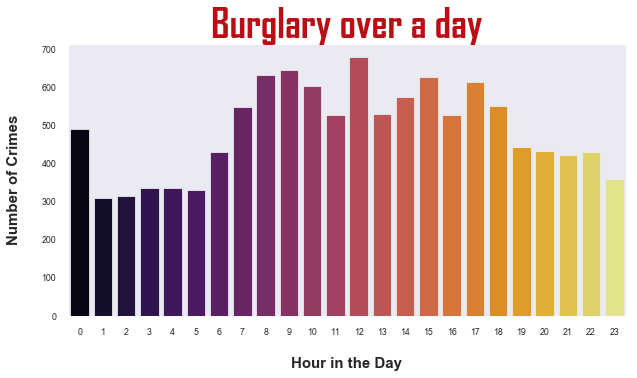

In [37]:
# analyse only for burglary
burglary_df = df[df['Primary Type']=='BURGLARY']
hours = [int(x) for x in list(burglary_df['Hour_Day'].unique())]
hours = sorted(hours)
# print(hours)

bur_cri = list(burglary_df['Hour_Day'].value_counts().sort_index())
# print(bur_cri)

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=hours, y=bur_cri, palette='inferno')

# Aesthetic appeal
plt.title("Burglary over a day", fontdict={'fontsize': 40, 'color': '#bb0e14','fontname':'Agency FB'}, weight="bold")
plt.xlabel("\nHour in the Day", fontdict={'fontsize': 15}, weight='bold')
plt.ylabel("Number of Crimes\n", fontdict={'fontsize': 15}, weight="bold")

# show plot
plt.show()

No. Your house is not at all safe froma burglary during the day. Infact, most burglaries happen when there still is sunlight!

<h3>Visualize a Crime's Pattern for 24 hours in 2018</h3>

Enter the crime you wish to see the 24 hour pattern off >> theft


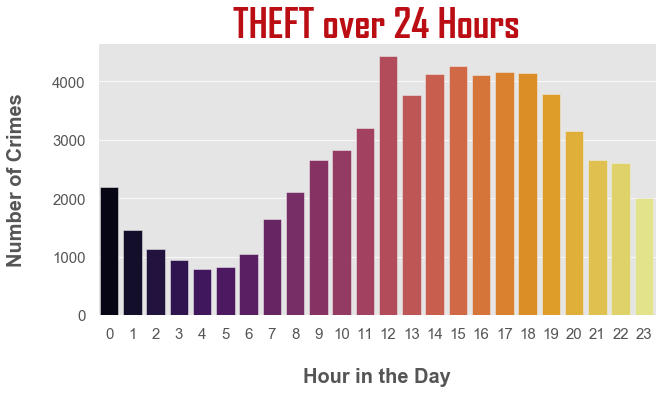

In [38]:
#sns.set_style('darkgrid')
plt.style.use('ggplot')
# An analysis of the 24 hour pattern for crimes
c = input("Enter the crime you wish to see the 24 hour pattern off >> ")

crime_df = df[df['Primary Type']==c.upper()]
hours = [int(x) for x in list(crime_df['Hour_Day'].unique())]
hours = sorted(hours)
# print(hours)

h_cri = list(crime_df['Hour_Day'].value_counts().sort_index())
# print(bur_cri)

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=hours, y=h_cri, palette='inferno')

# Aesthetic appeal
tit = c.upper()+" over 24 Hours"
plt.title(tit, fontdict={'fontsize': 40, 'color': '#bb0e14','fontname':'Agency FB'}, weight="bold")
plt.xlabel("\nHour in the Day", fontdict={'fontsize': 20}, weight='bold')
plt.ylabel("Number of Crimes\n", fontdict={'fontsize': 20}, weight="bold")
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

# show plot
plt.show()

<h2>3. Crime vs Locations</h2>
<h3>A rough Chicago Map using the Location Co-ordinates</h3>

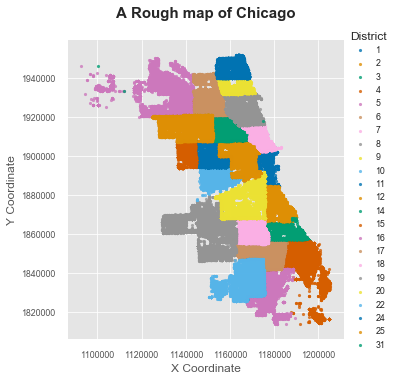

In [39]:
# Let's simulate the map of Chicago with the help of X and Y co-ordinates
sns.lmplot('X Coordinate', 
           'Y Coordinate',
           data=df,
           fit_reg=False, 
           hue="District",
           palette='colorblind',
           height=5,
           scatter_kws={"marker": "+", 
                        "s": 10})
ax = plt.gca()
ax.set_title("A Rough map of Chicago\n", fontdict={'fontsize': 15}, weight="bold")
plt.show()

<h3>Most Common Occurences per District</h3>

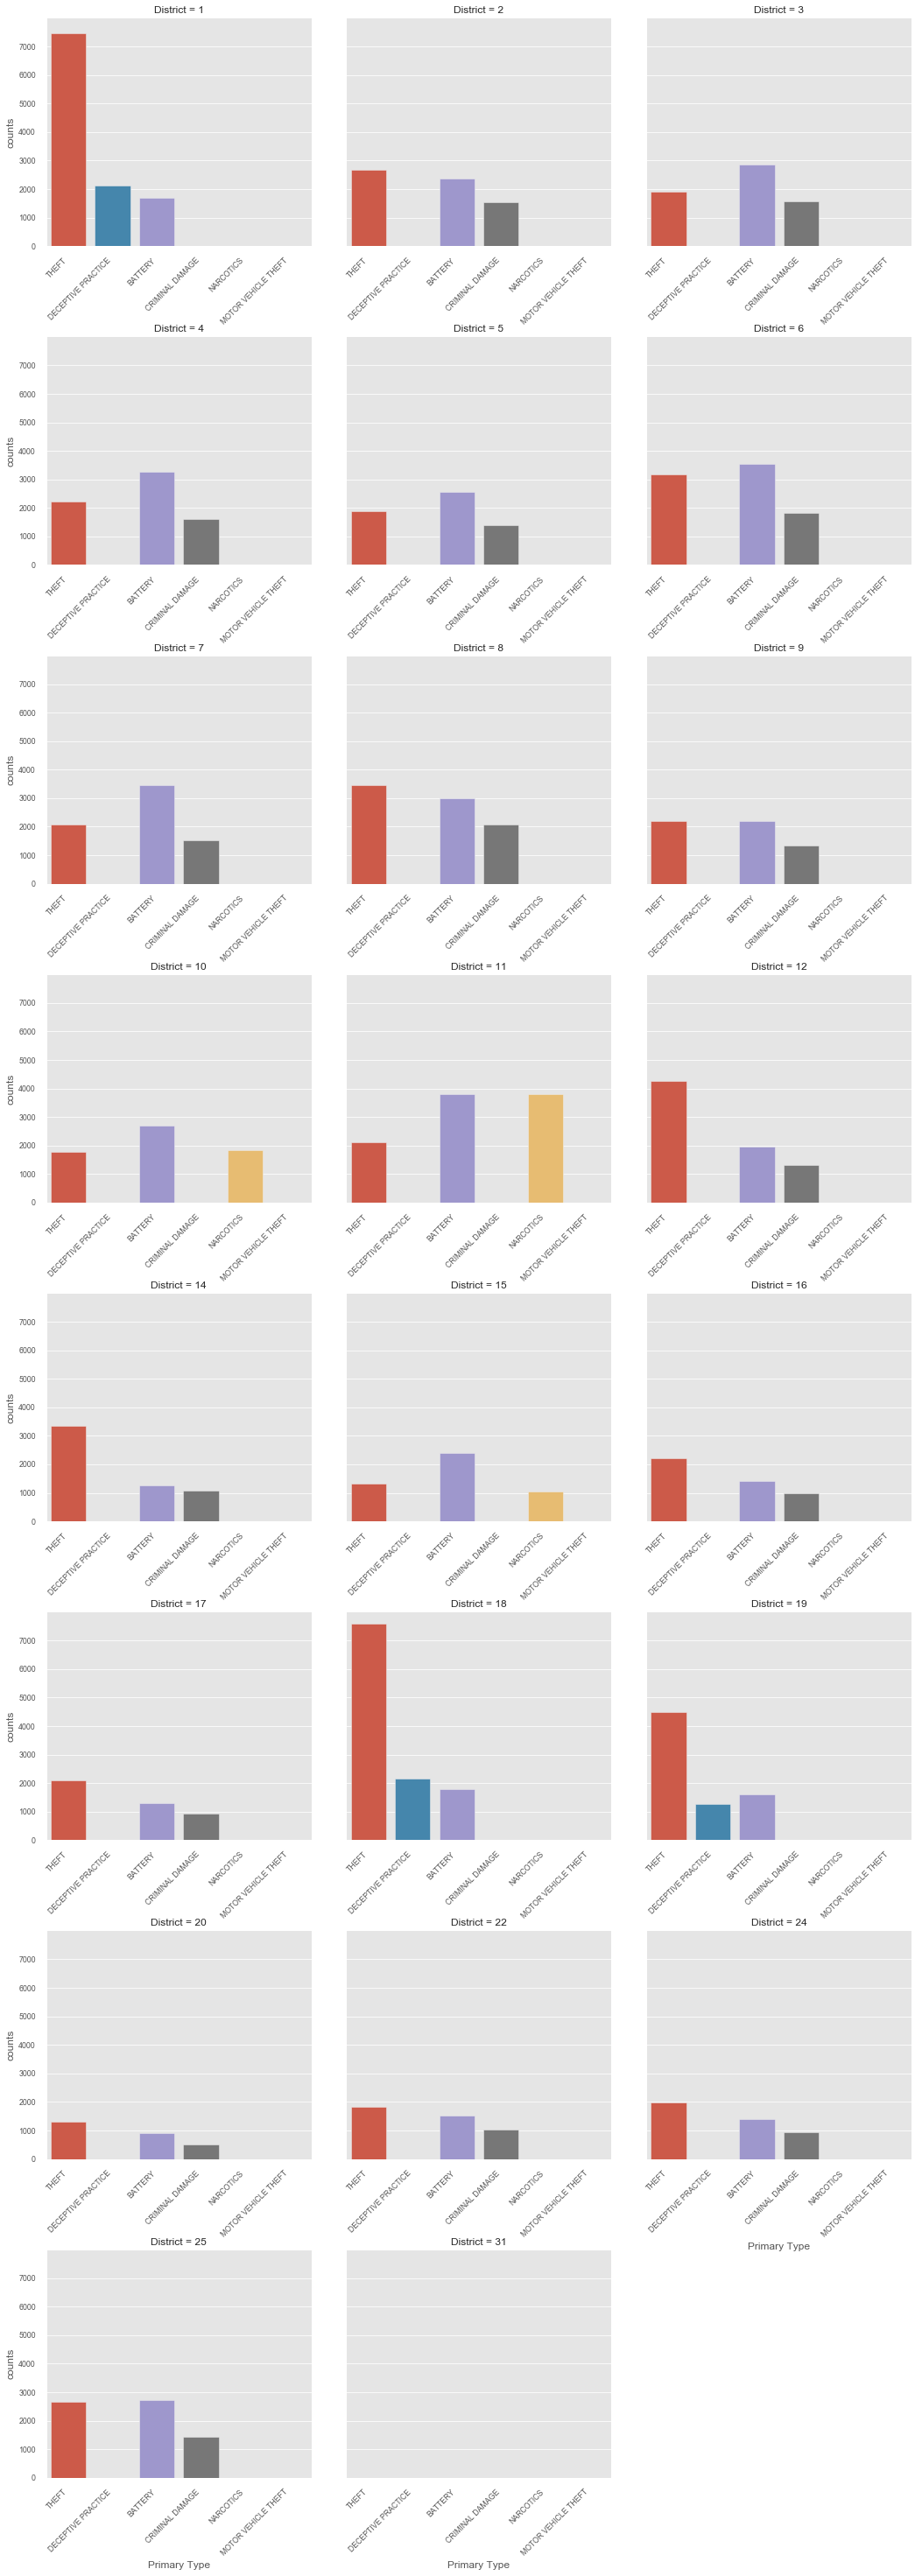

In [42]:
# location attributes = ['Location Description','Beat','District', 'Ward', 'Community Area','X Coordinate','Y Coordinate', 'Latitude', 'Longitude','Location']
%matplotlib inline
top = df.groupby(['District', 'Primary Type']).size().reset_index(name='counts').groupby('District').apply(lambda x: x.sort_values('counts',ascending=False).head(3))
#print(topk)

# factor plot to make multiple plots
g =sns.catplot("Primary Type", y='counts', col="District", col_wrap=3,
                   data=top, kind='bar')
for ax in g.axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=45, ha='right')

plt.subplots_adjust(hspace=0.4)

In [43]:
## Crime data distribution of gang based criminal activities
import folium

dp=df[df['Primary Type']=='DECEPTIVE PRACTICE']
battery = df[df['Primary Type']=='BATTERY']
cd = df[df['Primary Type']=='CRIMINAL DAMAGE']
mtheft = df[df['Primary Type']=='MOTOR VEHICLE THEFT']
theft = df[df['Primary Type']=='THEFT']
narcotics= df[df['Primary Type']=='NARCOTICS']
merge = cd.append(battery)
merge = merge.append(mtheft)
#merge = merge.append(cd)
merge = merge.append(dp)
merge = merge.append(theft)
merge = merge.append(narcotics)
chicago_map = folium.Map(location=[41.864073,-87.706819],
                        zoom_start=11,
                        tiles="openstreetmap")
locations = merge.groupby('Primary Type').nth(7)


new_locations = locations.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]


print(new_locations.head(6))


popup_text = """Community Index : {}<br
                Arrest : {}<br>
                Location Description : {}<br>"""


for i in range(len(new_locations)):
    lat = new_locations.iloc[i][0]
    long = new_locations.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_locations.index[i],
                               new_locations.iloc[i][-1],
                               new_locations.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(chicago_map)


#chicago_map.save('map.html')
display(chicago_map)

#chicago_map._build_map()


                      Latitude  Longitude          Location Description  \
Primary Type                                                              
BATTERY              41.889231 -87.620450                        STREET   
CRIMINAL DAMAGE      41.938743 -87.640783                         OTHER   
DECEPTIVE PRACTICE   41.842417 -87.685315  GOVERNMENT BUILDING/PROPERTY   
MOTOR VEHICLE THEFT  41.910869 -87.708463                        STREET   
NARCOTICS            41.874134 -87.670164                         OTHER   
THEFT                41.892446 -87.665979                     APARTMENT   

                     Arrest  
Primary Type                 
BATTERY               False  
CRIMINAL DAMAGE        True  
DECEPTIVE PRACTICE    False  
MOTOR VEHICLE THEFT    True  
NARCOTICS              True  
THEFT                 False  


In [54]:
a=''
a=input("enter the gang criminal activity for frequency of a crime in location ")
a=a.upper()
var=df[df['Primary Type']==a]
unique_locations = var['Location'].value_counts()
print("%%%%%%%%%%%%%%%%%%%%%%%%%%% ",len(unique_locations))
#print("%%%%%%%%%%%%%%%%%%%%%%%%%%% ",unique_locations)


unique_locations.index


CR_index = pd.DataFrame({"Raw_String" : unique_locations.index, "ValueCount":unique_locations})
CR_index.index = range(len(unique_locations))
print(CR_index.head())
print("valuecount",len(CR_index['ValueCount']))
def Location_extractor(Raw_Str):
    preProcess = Raw_Str[1:-1].split(',')
    lat =  float(preProcess[0])
    long = float(preProcess[1])
    return (lat, long)


CR_index['LocationCoord'] = CR_index['Raw_String'].apply(Location_extractor)


CR_index  = CR_index.drop(columns=['Raw_String'], axis = 1)


#chicago_map._build_map()
#%%time

chicago_map_crime = folium.Map(location=[41.895140898, -87.624255632],
                        zoom_start=13,
                        tiles="openstreetmap")

for i in range(500):
    lat = CR_index['LocationCoord'].iloc[i][0]
    long = CR_index['LocationCoord'].iloc[i][1]
    radius = CR_index['ValueCount'].iloc[i] / 50
    
    if CR_index['ValueCount'].iloc[i] > 60:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Criminal Incidents : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               CR_index['ValueCount'].iloc[i]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(chicago_map_crime)
    
#chicago_map_crime.save('crime.html')

display(chicago_map_crime)


enter the gang criminal activity for frequency of a crime in location narcotics
%%%%%%%%%%%%%%%%%%%%%%%%%%%  9523
                      Raw_String  ValueCount
0  (41.868180939, -87.709271389)         189
1  (41.902365801, -87.716854733)          40
2  (41.953900467, -87.907472601)          38
3  (41.878931004, -87.639585621)          21
4  (41.880399914, -87.753008553)          20
valuecount 9523


<h3>Which region is a given Crime concentrated in ? [Can be used for understanding Gang activity also]</h3>

Enter the crime you wish to see the concentration of in the city >> theft


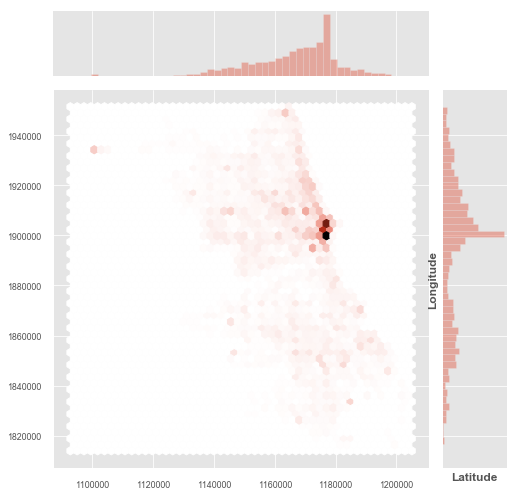

In [45]:
# let's take in the crime as an input as always
c = input("Enter the crime you wish to see the concentration of in the city >> ")
crime_df = df[df['Primary Type']==c.upper()]

sns.jointplot(x=crime_df['X Coordinate'].values, y=crime_df['Y Coordinate'].values, height=7, kind='hex')

plt.xlabel("Latitude", fontdict={'fontsize': 12}, weight='bold')
plt.ylabel("Longitude", fontdict={'fontsize': 12}, weight="bold")
plt.show()

In [46]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Hour_Day
0,11268908,JB202456,2018-03-28 07:50:00,004XX W DIVISION ST,0860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,True,False,...,06,1173175.0,1908290.0,2018,02/20/2019 04:21:43 PM,41.903776,-87.639324,"(41.903775756, -87.639324074)",March,07
1,11210587,JB124894,2018-01-22 00:10:00,0000X E CHESTNUT ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,02,1176408.0,1906333.0,2018,02/20/2019 04:21:43 PM,41.898333,-87.627508,"(41.898333269, -87.62750777)",January,00
2,11207682,JB120881,2018-01-18 16:50:00,006XX N LECLAIRE AVE,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,04B,1142252.0,1903601.0,2018,02/20/2019 04:21:43 PM,41.891539,-87.753029,"(41.891538918, -87.753028938)",January,16
20,24246,JB483810,2018-10-21 03:09:00,001XX N LOCKWOOD AVE,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,False,False,...,01A,1141019.0,1900701.0,2018,02/19/2019 04:13:26 PM,41.883604,-87.757629,"(41.883603754, -87.757628691)",October,03
23,11545463,JB565977,2018-11-21 14:53:00,058XX N KENMORE AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,...,11,1168187.0,1938987.0,2018,02/19/2019 04:13:26 PM,41.988119,-87.656756,"(41.98811891, -87.656756017)",November,14


## Crime data distribution based on district


In [55]:
''' You live in District 'X'. You wish to see the crime stats in X in the year 2018. You can choose your crime.
Visualize a time Series graph to see the same '''
dis = int(input("Enter the district you want to see: "))
crime = input("Enter the crime you want to visualize for: ").upper()

tsg_df = df[df['District']==dis]
tsg_df = tsg_df[tsg_df['Primary Type']==crime]

tsg_df = tsg_df[['Date', 'Block', 'Location Description', 'Location']]
tsg_df.head()

def func1(x):
    return x.strftime("%m")
tsg_df['Month'] = tsg_df['Date'].apply(func1)
#del tsg_df['Date']

tsg_df2 = tsg_df.groupby(['Month'], as_index=False).agg({"Date":'count'})

tsg_cds = ColumnDataSource(tsg_df2)

tit1 = "Time Series Graph for District "+str(dis)+" and Crime "+crime+"."
fig5 = figure(plot_height=400, plot_width=700, title=tit1+" (Hover over graph for specifics)", x_axis_label="Month", y_axis_label="Number of Crimes" )

fig5.xaxis.ticker = [1,2,3,4,5,6,7,8,9,10,11,12]
fig5.xaxis.major_label_overrides = {1: 'Jan', 2:'Feb', 3:'Mar', 4:'April',
                                   5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

# line plot in bokeh
fig5.line(x="Month", y="Date", source=tsg_cds, line_color="red", line_width=1.5)
fig5.circle(x="Month", y="Date", source=tsg_cds, color="black", fill_color="red", size=10)

# adding interactivity
tooltips = [("Month","@Month"), ("Crimes","@Date"),]
fig5.add_tools(HoverTool(tooltips=tooltips))

output_notebook()
show(fig5)

Enter the district you want to see: 10
Enter the crime you want to visualize for: theft


Loading BokehJS ...

<h3>Visualizing Narcotics (To get an understanding of the most prevalent type of drugs in the circle)</h3>

In [48]:
narc=df[df['Primary Type']=='NARCOTICS']
narc_data=pd.DataFrame({"Counts":narc['Description'].value_counts(),"Description":narc['Description'].value_counts().index})
narc_data.reset_index(inplace=True)
narc_data=narc_data.drop(columns=['index'],axis=1)
narc_data.head()

,Counts,Description
0,2392,POSS: HEROIN(WHITE)
1,1368,POSS: CANNABIS 30GMS OR LESS
2,1241,POSS: CRACK
3,1118,MANU/DEL:CANNABIS OVER 10 GMS
4,997,FOUND SUSPECT NARCOTICS


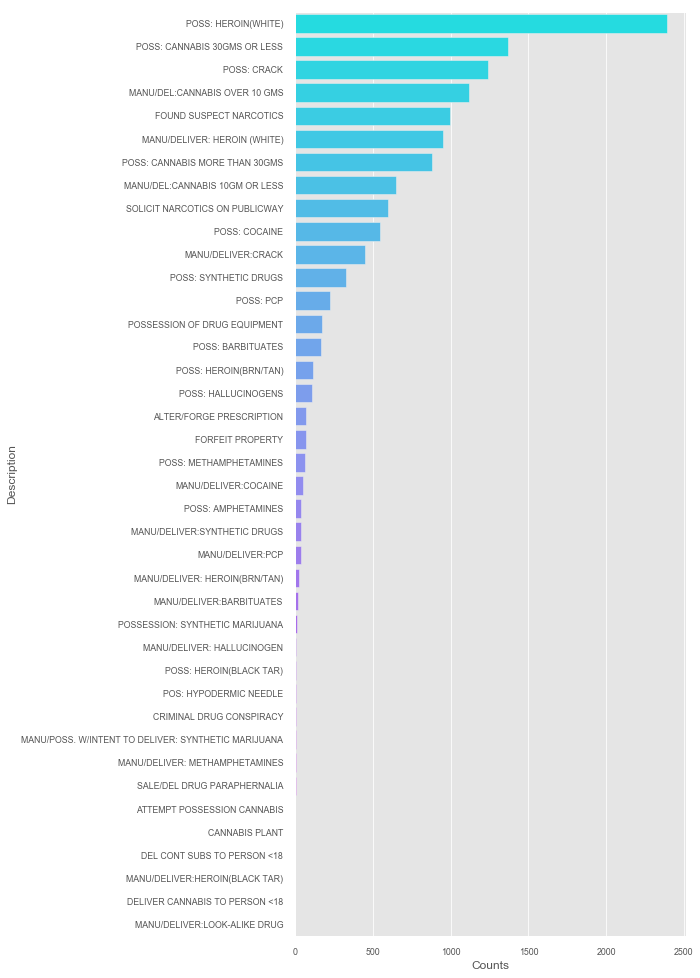

In [49]:
plt.figure(figsize=(7,17))
sns.barplot(y="Description", x= "Counts", data=narc_data, palette="cool")

<h3> Sin District </h3>

In [50]:
crimes = df['District'].unique()
crimes

array([18, 15, 20, 11,  4,  9, 25,  8, 12,  3,  1, 19, 14,  7, 22,  5,  6,
       17, 10, 24,  2, 16, 31], dtype=int64)

In [51]:


# Filter out the Top 5 criminal districts
top_5_District = df['District'].value_counts().sort_values(ascending=False).head()
top_5_District

#plt.show()

11    18819
6     16275
8     16171
18    15854
1     15256
Name: District, dtype: int64

In [52]:
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool

temp_cds = ColumnDataSource(temp)

fig1 = figure(plot_width=700, plot_height=400, title="Most occuring Criminal Offences District-wise",
             x_axis_label="Count of Crimes", y_axis_label="District number", x_range=(0, 70000))

fig1.title.align = "left"
fig1.title.text_color = "black"
fig1.title.text_font_size = "20px"

fig1.hbar(y='co-ordinates', right='Number', source=temp_cds, left=0, color='violet', alpha=0.5, height=0.50)
fig1.yaxis.major_label_overrides = {5: '11', 4:'6', 3:'8', 2:'18',
                                   1:'1'}

# Adding passive interactivity
tooltips = [
    ('Number of Crimes', '@Number'),
]

#fig1.legend.location
fig1.add_tools(HoverTool(tooltips=tooltips))

output_notebook()
show(fig1)

Loading BokehJS ...

<h2> The Models </h2>







<h3>Classfication of Crime Type</h3>

In [58]:
import pandas as pd
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [59]:
tc = df['Primary Type'].value_counts().sort_values(ascending=False).head()
print(tc)

THEFT                 64032
BATTERY               49727
CRIMINAL DAMAGE       27701
ASSAULT               20343
DECEPTIVE PRACTICE    17233
Name: Primary Type, dtype: int64


In [60]:
X = df[['Arrest', 'Domestic', 'Beat', 'Community Area',
                   'Latitude', 'Longitude', 'Year', 'Hour_Day']]
y = df['Primary Type']

In [61]:
X = X.fillna(0)
feature_names = list(X)
target_names = list(y)

In [65]:
from sklearn.model_selection import train_test_split
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

In [63]:
clf = OneVsRestClassifier(AdaBoostClassifier())
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
          n_jobs=None)

In [64]:
results = cross_val_score(clf, X, y, cv=3)

c:\users\jaswanth marri\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


In [66]:
print(("Accuracy: %.3f%% (%.3f%%)") % (results.mean()*100.0, results.std()*100.0))

Accuracy: 36.537% (0.090%)


### Classifying Crime Hotspots

We will have to do a fair bit of manipulation on our dataset for that.

In [67]:
def day(x):
    return x.strftime("%A")
df['Day'] = df['Date'].apply(day)

In [68]:
# Make a new dataset for the predictions
cols = ['Date', 'Block', 'Location Description', 'Domestic', 'District','Month', 'Primary Type']
new_df = df[cols]
new_df.head()

,Date,Block,Location Description,Domestic,District,Month,Primary Type
0,2018-03-28 07:50:00,004XX W DIVISION ST,GROCERY FOOD STORE,False,18,March,THEFT
1,2018-01-22 00:10:00,0000X E CHESTNUT ST,HOTEL/MOTEL,False,18,January,CRIM SEXUAL ASSAULT
2,2018-01-18 16:50:00,006XX N LECLAIRE AVE,STREET,False,15,January,BATTERY
20,2018-10-21 03:09:00,001XX N LOCKWOOD AVE,AUTO,False,15,October,HOMICIDE
23,2018-11-21 14:53:00,058XX N KENMORE AVE,RESIDENCE,False,20,November,DECEPTIVE PRACTICE


Let's do some feature engineering !

In [69]:
def new_hour(x):
    return int(x.strftime("%H"))
new_df['Hour'] = new_df['Date'].apply(new_hour)

c:\users\jaswanth marri\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
def new_day(x):
    return int(x.strftime("%w"))
new_df['Day'] = new_df['Date'].apply(new_day)

c:\users\jaswanth marri\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
def new_month(x):
    return int(x.strftime("%m"))
new_df['Month_num'] = new_df['Date'].apply(new_month)

c:\users\jaswanth marri\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
new_df.head()

,Date,Block,Location Description,Domestic,District,Month,Primary Type,Hour,Day,Month_num
0,2018-03-28 07:50:00,004XX W DIVISION ST,GROCERY FOOD STORE,False,18,March,THEFT,7,3,3
1,2018-01-22 00:10:00,0000X E CHESTNUT ST,HOTEL/MOTEL,False,18,January,CRIM SEXUAL ASSAULT,0,1,1
2,2018-01-18 16:50:00,006XX N LECLAIRE AVE,STREET,False,15,January,BATTERY,16,4,1
20,2018-10-21 03:09:00,001XX N LOCKWOOD AVE,AUTO,False,15,October,HOMICIDE,3,0,10
23,2018-11-21 14:53:00,058XX N KENMORE AVE,RESIDENCE,False,20,November,DECEPTIVE PRACTICE,14,3,11


#### Key

Month : 1-12<br>
Day : 0-6 (0 is Sunday)<br>
Hour : 0-23 (24 hour format)<br>

In [73]:
# replacing in Domestic (Let's use Label Encoding)
new_df['Location Description'] = new_df['Location Description'].astype('category')
new_df['Domestic'] = new_df['Domestic'].astype('category')
# new_df['Primary Type'] = new_df['Primary Type'].astype('category')
# new_df.dtypes
new_df['Location_Cat'] = new_df['Location Description'].cat.codes
new_df['Domestic_Cat'] = new_df['Domestic'].cat.codes
# new_df['Crime_Cat'] = new_df['Primary Type'].cat.codes
new_df.head()

c:\users\jaswanth marri\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\jaswanth marri\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\jaswanth marri\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on

,Date,Block,Location Description,Domestic,District,Month,Primary Type,Hour,Day,Month_num,Location_Cat,Domestic_Cat
0,2018-03-28 07:50:00,004XX W DIVISION ST,GROCERY FOOD STORE,False,18,March,THEFT,7,3,3,72,0
1,2018-01-22 00:10:00,0000X E CHESTNUT ST,HOTEL/MOTEL,False,18,January,CRIM SEXUAL ASSAULT,0,1,1,79,0
2,2018-01-18 16:50:00,006XX N LECLAIRE AVE,STREET,False,15,January,BATTERY,16,4,1,117,0
20,2018-10-21 03:09:00,001XX N LOCKWOOD AVE,AUTO,False,15,October,HOMICIDE,3,0,10,21,0
23,2018-11-21 14:53:00,058XX N KENMORE AVE,RESIDENCE,False,20,November,DECEPTIVE PRACTICE,14,3,11,101,0


We have converted Location Description, Domestic, Primary Type into numeric values.

In [74]:
def day_conv(x):
    return x.strftime("%a")
new_df['Day Name'] = new_df['Date'].apply(day_conv)

c:\users\jaswanth marri\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<h2>Visualizing With Heatmaps</h2>

In [75]:
cri = new_df.groupby(['Location Description','Month_num'], as_index=False).agg({"Primary Type":"count"})
cri = cri.sort_values(by=['Primary Type','Month_num'], ascending=False)

cri2 = new_df.groupby(['Location Description','Day'], as_index=False).agg({"Primary Type":"count"})
cri2 = cri2.sort_values(by=['Primary Type','Day'], ascending=False)

In [76]:
cri = cri.head(200)
cri = cri.pivot("Location Description", "Month_num", "Primary Type")

cri2 = cri2.head(100)
cri2 = cri2.pivot("Location Description", "Day", "Primary Type")

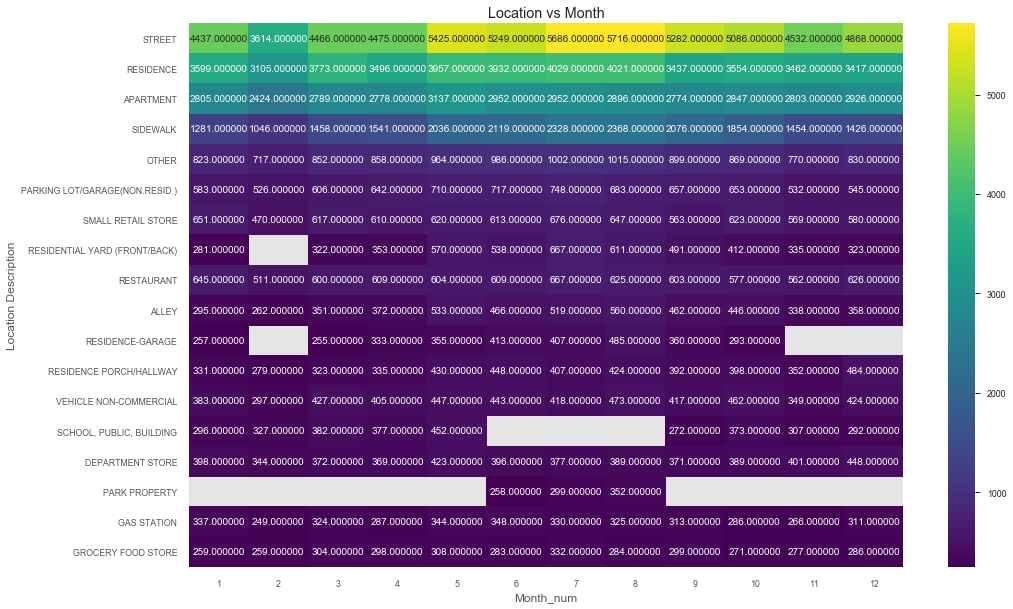

In [77]:
# Plotting for Location vs Month
plt.figure(figsize = (16,10))
plt.title("Location vs Month")
with sns.axes_style("white"):
    sns.heatmap(cri, mask=cri.isnull(), cmap="viridis",annot=True,fmt="f")

Whitespaces are "Missing Values"<br>

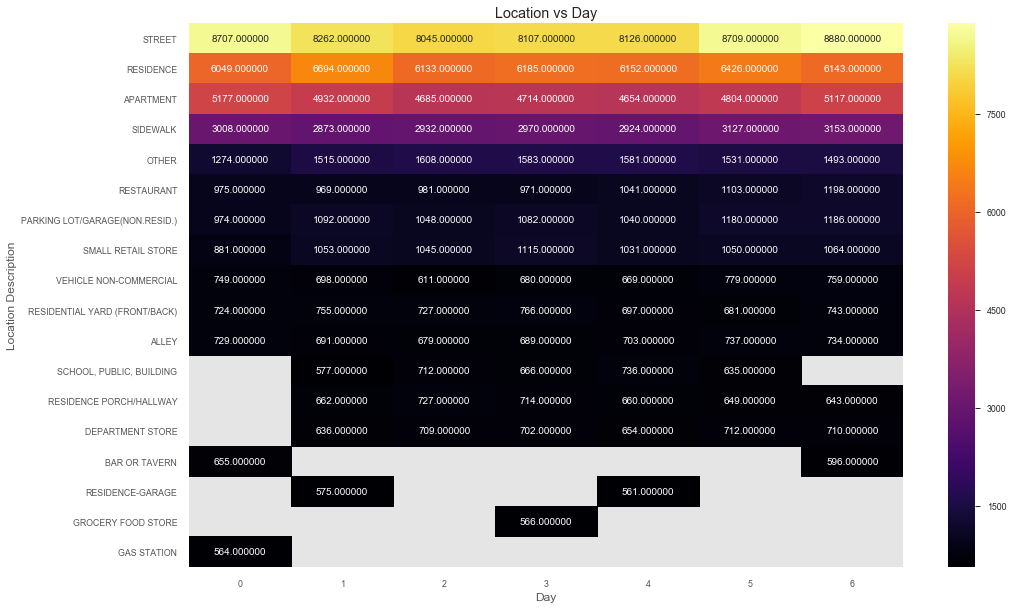

In [78]:
# Plotting for Location vs Day
plt.figure(figsize = (16,10))
plt.title("Location vs Day")
with sns.axes_style("white"):
    sns.heatmap(cri2, mask=cri2.isnull(), cmap="inferno",annot=True,fmt="f")

In [79]:
# Gang Activity
gang_crimes = ['NARCOTICS', 'HOMICIDE', 'WEAPONS VIOLATION', 'CONCEALED CARRY LICENSE VIOLATION', 'KIDNAPPING', 'BURGLARY']
gang_df = new_df[new_df['Primary Type'].isin(gang_crimes)]
gang_df.shape

(30831, 13)

In [80]:
gang_df = gang_df[gang_df['Domestic']==False] # Domestic crimes are not usually gang crimes
gang_df.shape

(30573, 13)

In [81]:
del [gang_df['Date'],gang_df['Block'],gang_df['Domestic'],gang_df['Domestic_Cat']]
gang_df.head()

,Location Description,District,Month,Primary Type,Hour,Day,Month_num,Location_Cat,Day Name
20,AUTO,15,October,HOMICIDE,3,0,10,21,Sun
37,ALLEY,14,May,WEAPONS VIOLATION,23,3,5,15,Wed
40,RESIDENCE,25,March,BURGLARY,10,3,3,101,Wed
42,PARKING LOT/GARAGE(NON.RESID.),8,June,KIDNAPPING,0,2,6,96,Tue
65,RESIDENTIAL YARD (FRONT/BACK),19,October,BURGLARY,0,1,10,104,Mon


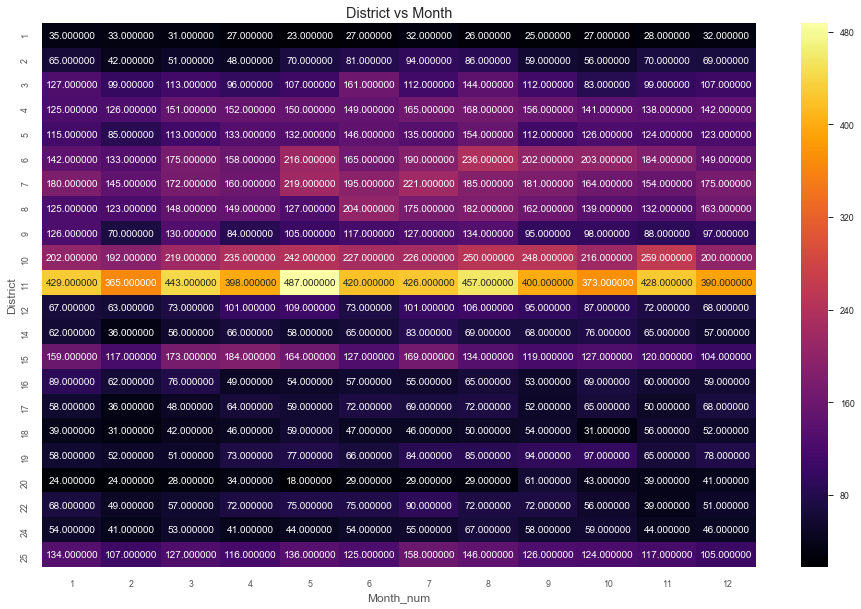

In [82]:
# Plotting for District vs Month in Gang crimes
cri3 = gang_df.groupby(['District','Month_num'],as_index=False).agg({'Primary Type':"count"})
cri3.columns

cri3 = cri3.pivot("District", "Month_num", "Primary Type")


plt.figure(figsize = (16,10))
plt.title("District vs Month")
with sns.axes_style("white"):
    sns.heatmap(cri3, mask=cri3.isnull(), cmap="inferno", annot=True, fmt="f")

District 11 is indeed <strong>"Sin District" </strong>!

In [83]:
gang_df2 = new_df[new_df['Primary Type'].isin(gang_crimes)]
gang_df2 = gang_df2[gang_df2['Domestic']==False] # Domestic crimes are not usually gang crimes
del [gang_df2['Date'],gang_df2['Block'],gang_df2['Domestic'],gang_df2['Domestic_Cat']]

gang_df2['Primary Type'] = gang_df2['Primary Type'].astype('category')
gang_df2['Primary Type'] = gang_df2['Primary Type'].cat.codes

gang_df2['Location Description'] = gang_df2['Location Description'].astype('category')
gang_df2['Location Description'] = gang_df2['Location Description'].cat.codes

del [gang_df2['Day Name'], gang_df2['Month']]
print(gang_df2.head())
print("\nShape of dataset :",gang_df2.shape)

    Location Description  District  Primary Type  Hour  Day  Month_num  \
20                    21        15             2     3    0         10   
37                    15        14             5    23    3          5   
40                   101        25             0    10    3          3   
42                    96         8             3     0    2          6   
65                   104        19             0     0    1         10   

    Location_Cat  
20            21  
37            15  
40           101  
42            96  
65           104  

Shape of dataset : (30573, 7)


In [84]:
gang_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30573 entries, 20 to 265696
Data columns (total 7 columns):
Location Description    30573 non-null int16
District                30573 non-null int64
Primary Type            30573 non-null int8
Hour                    30573 non-null int64
Day                     30573 non-null int64
Month_num               30573 non-null int64
Location_Cat            30573 non-null int16
dtypes: int16(2), int64(4), int8(1)
memory usage: 1.3 MB


<h3>Using k-means clustering algorithm to cluster Gang Related Crimes as per Crime Type</h3>

In [85]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

X = np.array(gang_df2.drop(['Primary Type'], 1).astype(float))
y = np.array(gang_df2['Primary Type'])

kmeans = KMeans(n_clusters=7, random_state=10) # Clustering the crimes into 7 (For each gang related crime)
kmeans.fit(X)

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print("Accuracy: ",correct/len(X))

Accuracy:  0.30952147319530304


In [86]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=7, max_iter=10000000, algorithm = 'auto', random_state=30000)
kmeans.fit(X_scaled)

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print("Accuracy :",correct/len(X))

Accuracy : 0.4181140221764302


The above is our best accuracy at using k-means clustering to cluster the crimes into the 7 major gang type crimes.

<h2> Using Supervised Machine Learning to Predict Crime Hotspots</h2>

In [87]:
# Creating our explicit dataset
cri4 = new_df.groupby(['Month_num','Day','District','Hour'], as_index=False).agg({"Primary Type":"count"})
cri4 = cri4.sort_values(by=['District'], ascending=False)
cri4.head()

,Month_num,Day,District,Hour,Primary Type
27483,8,4,31,9,1
20779,6,5,31,18,1
18214,6,0,31,21,1
22331,7,1,25,14,13
22329,7,1,25,12,10


In [88]:
cri4 = cri4[['Month_num','Day','Hour','Primary Type','District']]
cri4.head()
cri4.shape

(42774, 5)

In [89]:
print(cri4['Primary Type'].max(),cri4['Primary Type'].min())

33 1


In [90]:
print("Average no. of crime per month per day per district per hour :",cri4['Primary Type'].sum()/42774,".")

Average no. of crime per month per day per district per hour : 6.147659793332398 .


So, let's take 7 as the threshold values for categorising the crimes as low and high crime rates.<br>
<ul><li>0-7 : Low Crime Rate</li>
    <li>8-15 : Medium Crime Rate</li>
    <li>16-33 : High Crime Rate</li>
</ul>

In [91]:
# Feature Engineer and create a new feature
def crime_rate_assign(x):
    if(x<=7):
        return 0
    elif(x>7 and x<=15):
        return 1
    else:
        return 2
cri4['Alarm'] = cri4['Primary Type'].apply(crime_rate_assign)
cri4 = cri4[['Month_num','Day','Hour','District','Primary Type','Alarm']]
cri4.head()

,Month_num,Day,Hour,District,Primary Type,Alarm
27483,8,4,9,31,1,0
20779,6,5,18,31,1,0
18214,6,0,21,31,1,0
22331,7,1,14,25,13,1
22329,7,1,12,25,10,1


These are the categories we have specified :<br>
<ul><li>0 : Low Alarm</li>
    <li>1 : Medium Alarm</li>
    <li>2 : High Alarm</li>
</ul>

Let's view this as a <strong>Supervised Classification Algorithm</strong>.<br>

In [92]:
# Using Decision Trees for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.multiclass import unique_labels

X = cri4[['Month_num', 'Day', 'Hour', 'District']] # independent
y = cri4['Alarm'] # dependent

# Let's split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) # 75:25 split

# print(X_train)
# print('hi')
# print(X_test)
# Creating tree
d_tree = DecisionTreeClassifier(random_state=10)
# Fitting tree
d_tree = d_tree.fit(X_train, y_train)
# Predicting !
y_pred = d_tree.predict(X_test)

# Model Evaluation
# print(y_test)
# print(y_pred)
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)

Accuracy: 70.33850757434075 


----------Confusion Matrix------------------------------------
Predicted Alarm     0     1    2
Actual Alarm                    
0                5926  1421   59
1                1316  1516  182
2                  50   144   80

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      7406
           1       0.49      0.50      0.50      3014
           2       0.25      0.29      0.27       274

   micro avg       0.70      0.70      0.70     10694
   macro avg       0.52      0.53      0.52     10694
weighted avg       0.71      0.70      0.71     10694


UAR -> 0.5317062995784726


In [93]:
# Using Random Forest for classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib

X = cri4.iloc[:,0:4].values
y = cri4.iloc[:,5].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 10)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)

c:\users\jaswanth marri\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\jaswanth marri\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\jaswanth marri\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy: 73.91995511501777 


----------Confusion Matrix------------------------------------
Predicted Alarm     0     1   2
Actual Alarm                   
0                6398   949  10
1                1524  1453  71
2                  49   186  54

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      7357
           1       0.56      0.48      0.52      3048
           2       0.40      0.19      0.25       289

   micro avg       0.74      0.74      0.74     10694
   macro avg       0.59      0.51      0.54     10694
weighted avg       0.72      0.74      0.73     10694


UAR -> 0.5110684007157605
